In [1]:
### ATOC7500 - eigenanalysis_example
## coded by Vineel Yettella (University of Colorado)
## Last updated February 15, 2019

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.linalg as LA
%matplotlib inline

### 1) Create a synthetic 2d dataset, plot it, and print some summary statistics.

x1: [0.6694277  3.92458337 6.47618978 2.59891385 0.46037795]
x2: [ 8.63344996 10.90283044 12.12304862 10.06722733  7.36930695]


Sample mean of x1: 3.216337071347951
Sample mean of x2: 10.089630600694473
Sample variance of x1: 4.221459748552925
Sample variance of x2: 1.2622346649876668
Total variance in the data: 5.483694413540592


Covariance Matrix
[[4.  1.6]
 [1.6 1. ]]


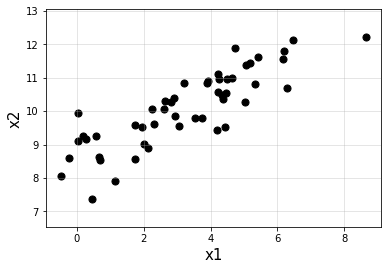

In [19]:
## Create the synthetic 2d dataset

#Choose the number of samples M
M = 50

variance_x1 = 4
variance_x2 = 1
mean_x1 = 3
mean_x2 = 10

#specified correlation between -1 and 1 to construct a valid covariance matrix
rho12 = 0.8

#create the population covariance matrix
covariance_matrix = [[variance_x1, rho12*np.sqrt(variance_x1*variance_x2)], [rho12*np.sqrt(variance_x1*variance_x2), variance_x2]]
covariance_matrix = np.around(covariance_matrix, decimals=3)

means = [mean_x1, mean_x2]
means = np.around(means, decimals=3)

#simulate
x1, x2 = np.random.multivariate_normal(means, covariance_matrix, M).T

#print a few values
print ('x1:', x1[0:5])
print('x2:', x2[0:5])

#print some summary statistics
print('\n')
print("Sample mean of x1: {}".format(np.mean(x1)))
print("Sample mean of x2: {}".format(np.mean(x2)))
print("Sample variance of x1: {}".format(np.var(x1)))
print("Sample variance of x2: {}".format(np.var(x2)))
print("Total variance in the data: {}".format(np.var(x1) + np.var(x2)))
print('\n')
print("Covariance Matrix")
print(covariance_matrix)

#plot x1, x2
plt.scatter(x1, x2, s=50, color = 'black')
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(alpha = 0.4)
plt.rcParams['axes.labelsize']=15


### 2) Calculate the eigenvectors and eigenvalues of the synthetic 2d dataset.

In [33]:
##Do the eigenanalysis

#construct data matrix X, convention: variables across columns and observations across rows
X = np.array([x1, x2]).T
print('Data matrix X shape:', X.shape, '\n')

X = X - np.mean(X, axis = 0) #remove mean from each column

#construct sample covariance matrix C
C  = (1/(M - 1))*np.dot(X.T, X)
#Alternatively, you could use numpy's cov function

eigenvals, eigenvecs = LA.eig(C) #compute eigenvectors and eigenvalues

inds = np.argsort(eigenvals) #eigen values in descending order
eigenvals = eigenvals[inds[::-1]] #reverse this array
eigenvecs = eigenvecs[:, inds[::-1]] #sort eigen vectors accordingly

print('eigen values:', eigenvals,'\n')
print('eigen vectors:')
print(eigenvecs)
print('\n')

print('Sum of eigen values:', np.sum(eigenvals))
print('Total variance in the data', np.sum(np.diag(C)))

Data matrix X shape: (50, 2) 

eigen values: [5.30772292 0.28788363] 

eigen vectors:
[[ 0.8948566  -0.44635374]
 [ 0.44635374  0.8948566 ]]


Sum of eigen values: 5.595606544429175
Total variance in the data 5.595606544429176


### 3) Plot the eigenvectors to show how they capture the orthogonal directions along which most of the variability in the dataset is explained.

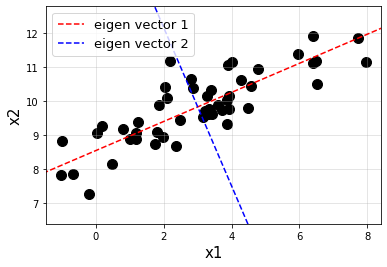

In [4]:
#plot eigen vectors
fig, ax = plt.subplots()
plt.scatter(x1, x2, s=100, color = 'black')
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(alpha = 0.4)
ylim = plt.ylim()
xlim = plt.xlim()
#plot eigen vector 1
plt.plot([-100*eigenvecs[0,0] + np.mean(x1), 100*eigenvecs[0,0] + np.mean(x1)],
         [-100*eigenvecs[1,0] + np.mean(x2), 100*eigenvecs[1,0] + np.mean(x2)], 
         linestyle = '--',color = 'red', label = 'eigen vector 1')
#plot eigen vector 2
plt.plot([-100*eigenvecs[0,1] + np.mean(x1), 100*eigenvecs[0,1] + np.mean(x1)],
         [-100*eigenvecs[1,1] + np.mean(x2), 100*eigenvecs[1,1] + np.mean(x2)], 
         linestyle = '--',color = 'blue', label = 'eigen vector 2')
plt.ylim(ylim);
plt.xlim(xlim);
plt.legend(fontsize = 13);